# LSTM model
Pure ERCOT load LSTM

### prediction frame
with n = 6 and m = 4
features:
t-n to t+m-1 of load ERCOT
labels:
t to t+m-1 of load ERCOT

In [1]:
import sys
 
# setting path
sys.path.append('../../../data')
from data import *

In [2]:
import datetime

start = datetime.datetime.now()

In [3]:
past_hours = 6
n_steps = past_hours
next_hours = 4
next_steps = next_hours

In [4]:
load_data.ERCOT[0:next_steps]

time
2011-03-01 01:00:00+00:00    32384.47
2011-03-01 02:00:00+00:00    33680.05
2011-03-01 03:00:00+00:00    33149.50
2011-03-01 04:00:00+00:00    31601.81
Name: ERCOT, dtype: float64

In [5]:
import numpy as np

In [6]:
steps = n_steps+next_steps
time_series =  np.array([load_data.ERCOT[i:i + steps].copy() for i in range(len(load_data) - steps) if load_data.ERCOT.index[i+steps] - load_data.ERCOT.index[i] == datetime.timedelta(hours=steps)])

time_series.shape

(94378, 10)

In [7]:
X = time_series[:, :n_steps]
Y = time_series[:, n_steps:]

print(X.shape, Y.shape)

(94378, 6) (94378, 4)


In [8]:
#sizes for test, train, and validation datasets
a = len(time_series)
b = int(0.9*a)
c = int(a-b)//2

In [9]:
X_train,    Y_train =   X[:b],      Y[:b]
X_val,      Y_val   =   X[b:b+c],   Y[b:b+c]
X_test,     Y_test  =   X[b+c:],    Y[b+c:]

print(X_train.shape, X_val.shape, X_test.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(84940, 6) (4719, 6) (4719, 6)
(84940, 4) (4719, 4) (4719, 4)


In [10]:
test_predictions = [[series[-1]] * next_steps for series in X_test]
op_list= [e for y in test_predictions for e in y]   #predicted list
ip_list = [e for y in Y_test for e in y]    #actual list
print(len(op_list), len(ip_list))

18876 18876


In [11]:
import pandas as pd
from statistics import mean, stdev
from sklearn.metrics import r2_score

In [12]:
test_labels = pd.DataFrame({'actual':ip_list})
predictions = pd.DataFrame({'predict':op_list})

error = predictions['predict'] - test_labels['actual']
rerror = 100*(predictions['predict'] - test_labels['actual'])/test_labels['actual']

print('Mean of error in test data:', mean(error))
print('Mean of absolute error in test data:', mean(abs(error)))
print('Root of mean of squared error in test data:', mean(error**2)**0.5)
print('Standard deviation of error in test data:', stdev(error))
print("=============================================================")
print('MPE (%):', mean(rerror))
print('MAPE (%):', mean(abs(rerror)))
print('RMSPE (%):', mean(rerror**2)**0.5)
print('Deviation of error (%):', stdev(rerror))
print("=============================================================")
print('Mean of test data:', mean(test_labels['actual']))
print('Standard deviation of test data:', stdev(test_labels['actual']))
print("Coefficient of determination:",r2_score(test_labels['actual'], predictions['predict']))

Mean of error in test data: -0.09354365331638115
Mean of absolute error in test data: 3896.3718886416614
Root of mean of squared error in test data: 5117.2875822831165
Standard deviation of error in test data: 5117.423136919643
MPE (%): 0.5333168533382242
MAPE (%): 8.087192627421077
RMSPE (%): 10.396075226404863
Deviation of error (%): 10.38266171003056
Mean of test data: 47586.94378734902
Standard deviation of test data: 10122.94285891266
Coefficient of determination: 0.7444422322271749


In [13]:
#absolute errors
for threshold in [5,10,50,100,500,1000,1500,2000,3000,4000,5000]:
    accuracy = sum(abs(e) < threshold for e in error)/len(error)*100
    print('accuracy:', accuracy,'% with threshold of', threshold)

accuracy: 0.11655011655011654 % with threshold of 5
accuracy: 0.1854206399660945 % with threshold of 10
accuracy: 0.9906759906759907 % with threshold of 50
accuracy: 2.002542911633821 % with threshold of 100
accuracy: 9.912057639330367 % with threshold of 500
accuracy: 19.416189870735327 % with threshold of 1000
accuracy: 28.06738715829625 % with threshold of 1500
accuracy: 36.21529985166349 % with threshold of 2000
accuracy: 50.57215511760966 % with threshold of 3000
accuracy: 61.76626403899132 % with threshold of 4000
accuracy: 70.47573638482729 % with threshold of 5000


In [14]:
#relative errors
for threshold in [0.5,1,1.5,2,3,4,5]:
    accuracy = sum(abs(e) < threshold for e in rerror)/len(error)*100
    print('accuracy:', accuracy,'% with threshold of', threshold)

accuracy: 4.545454545454546 % with threshold of 0.5
accuracy: 8.81012926467472 % with threshold of 1
accuracy: 12.910574274210637 % with threshold of 1.5
accuracy: 17.101080737444374 % with threshold of 2
accuracy: 25.508582326764145 % with threshold of 3
accuracy: 33.39160839160839 % with threshold of 4
accuracy: 40.89319771137953 % with threshold of 5


In [15]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 48})

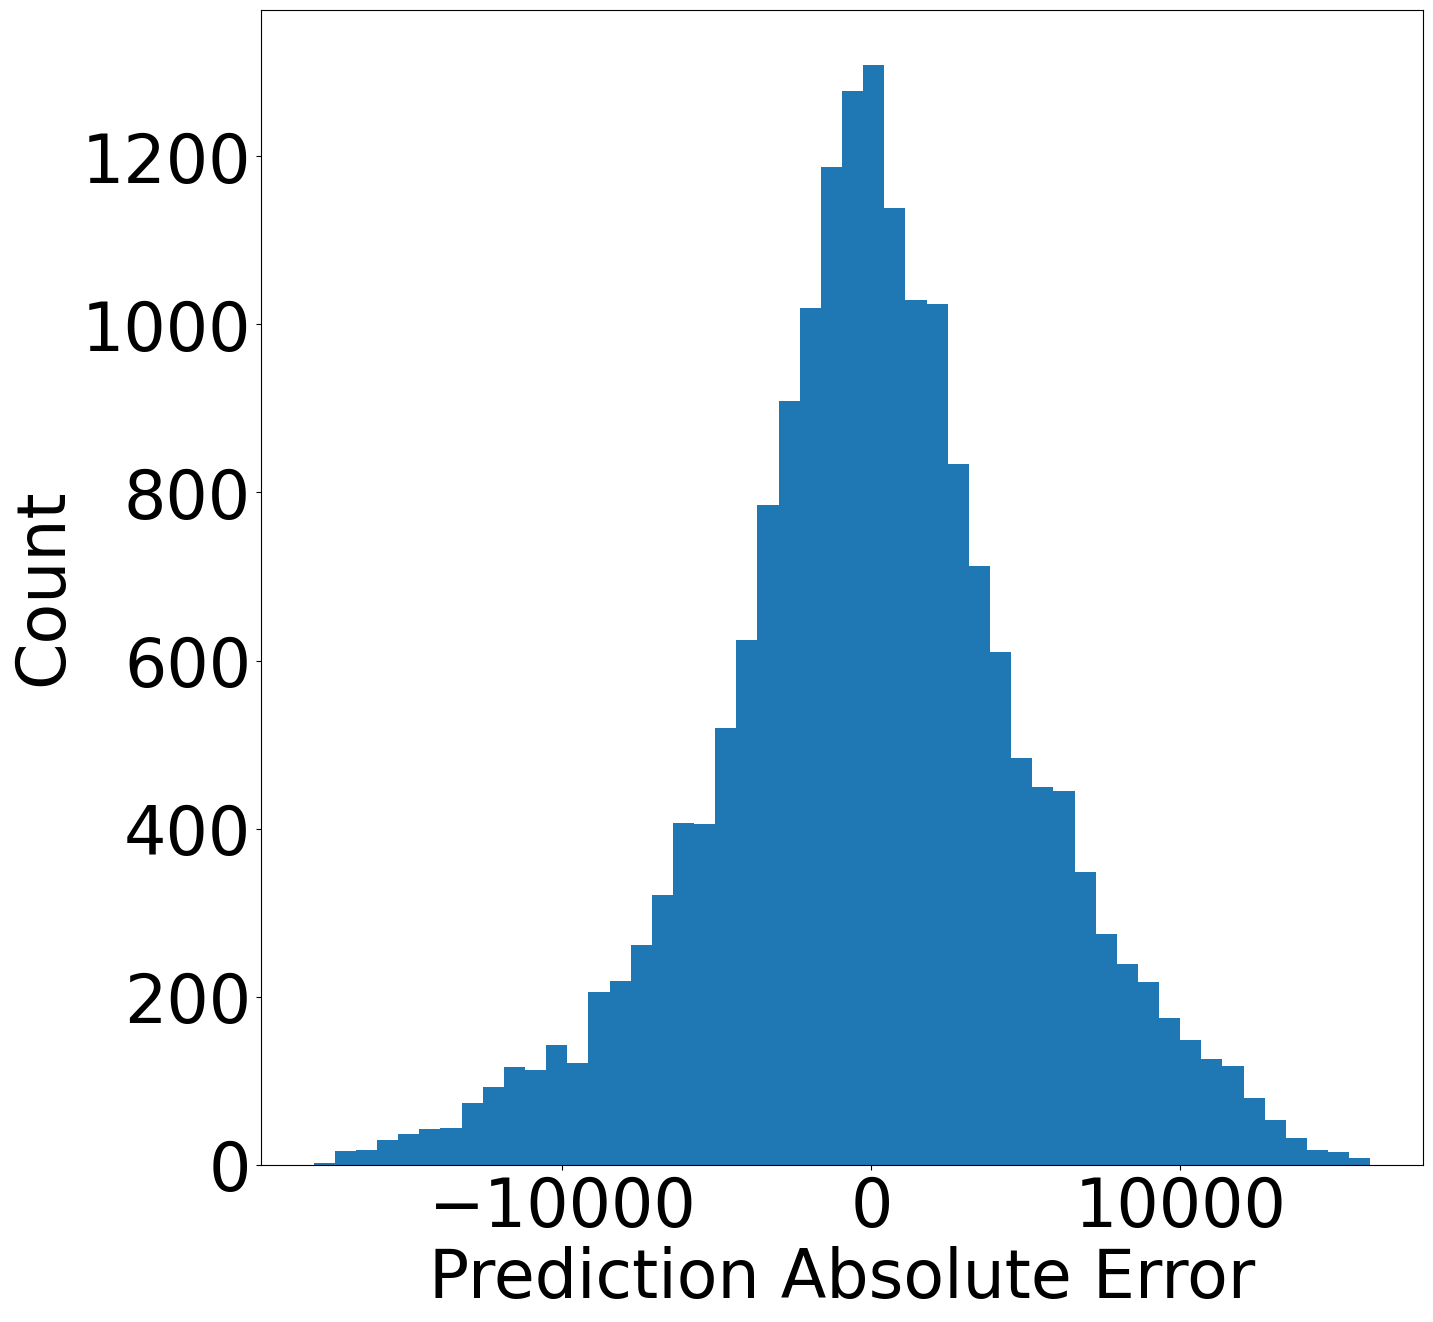

In [16]:
plt.figure(figsize=(15,15))
plt.hist(error, bins = 50)
plt.xlabel("Prediction Absolute Error")
_ = plt.ylabel("Count")

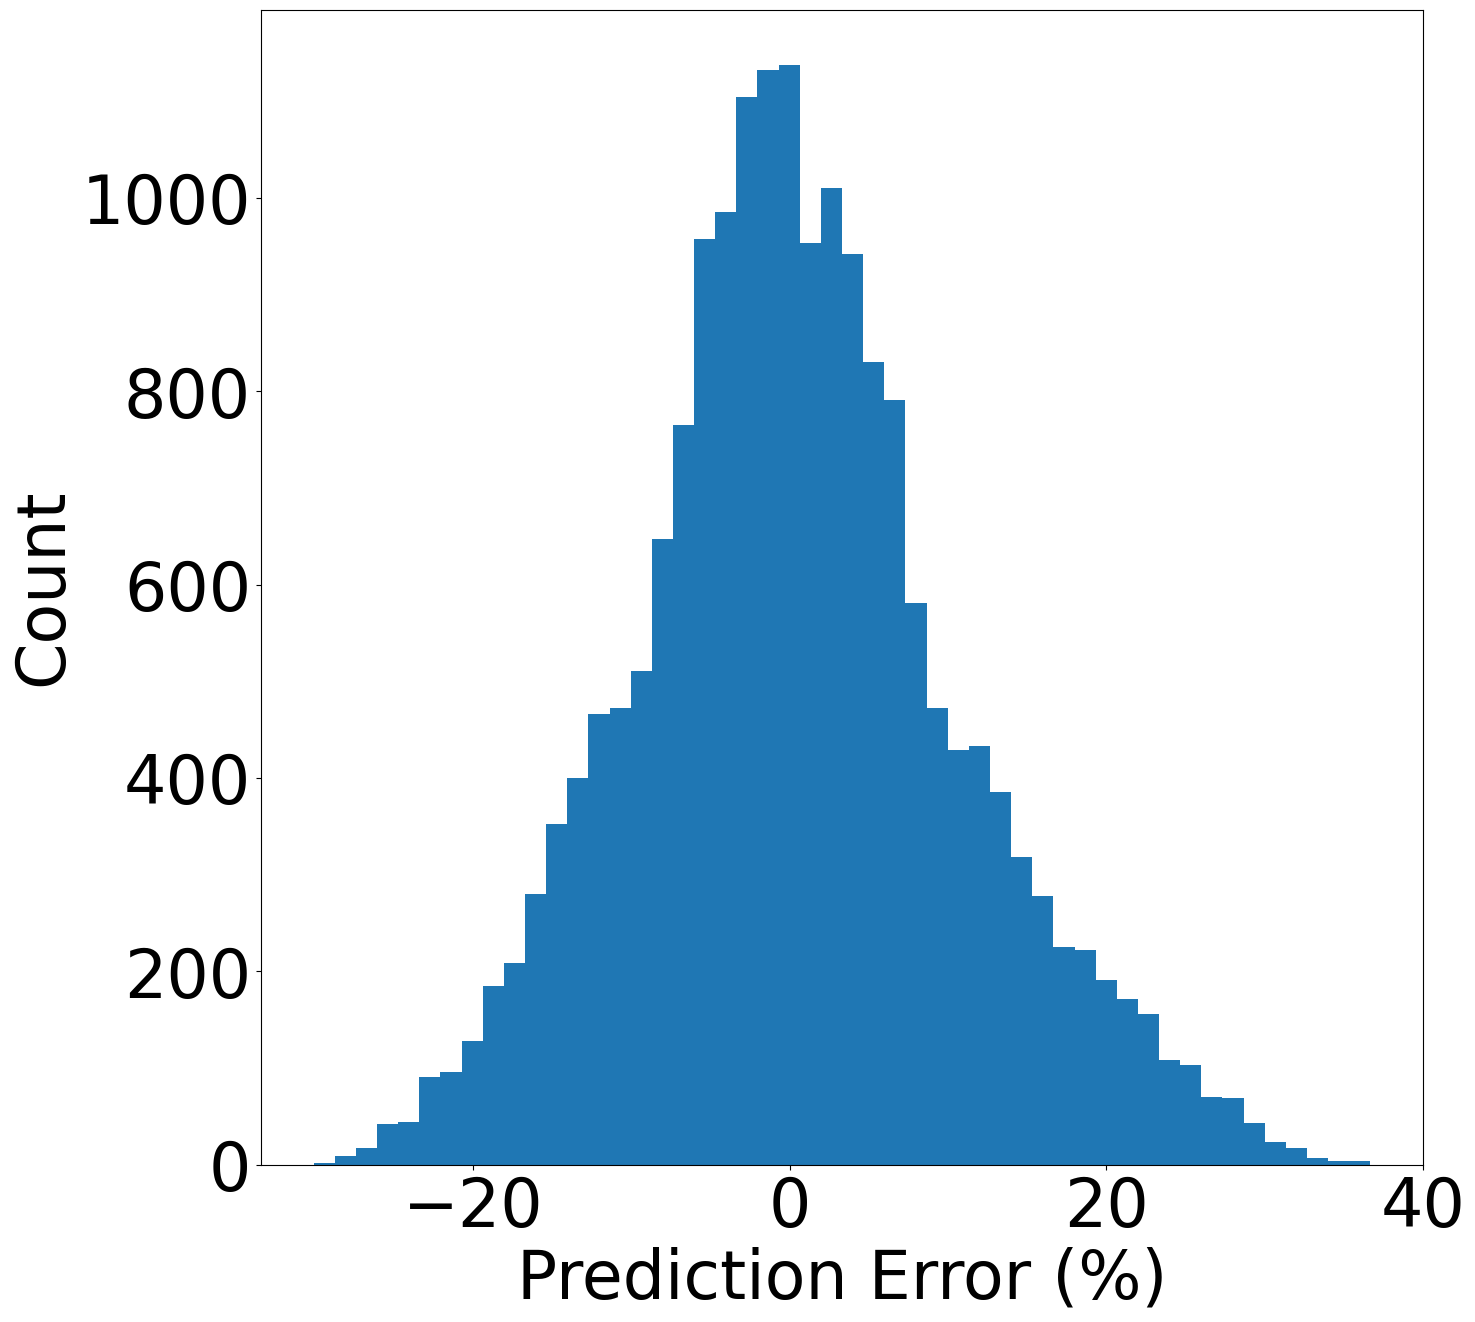

In [17]:
plt.figure(figsize=(15,15))
plt.hist(rerror, bins = 50)
plt.xlabel("Prediction Error (%)")
_ = plt.ylabel("Count")

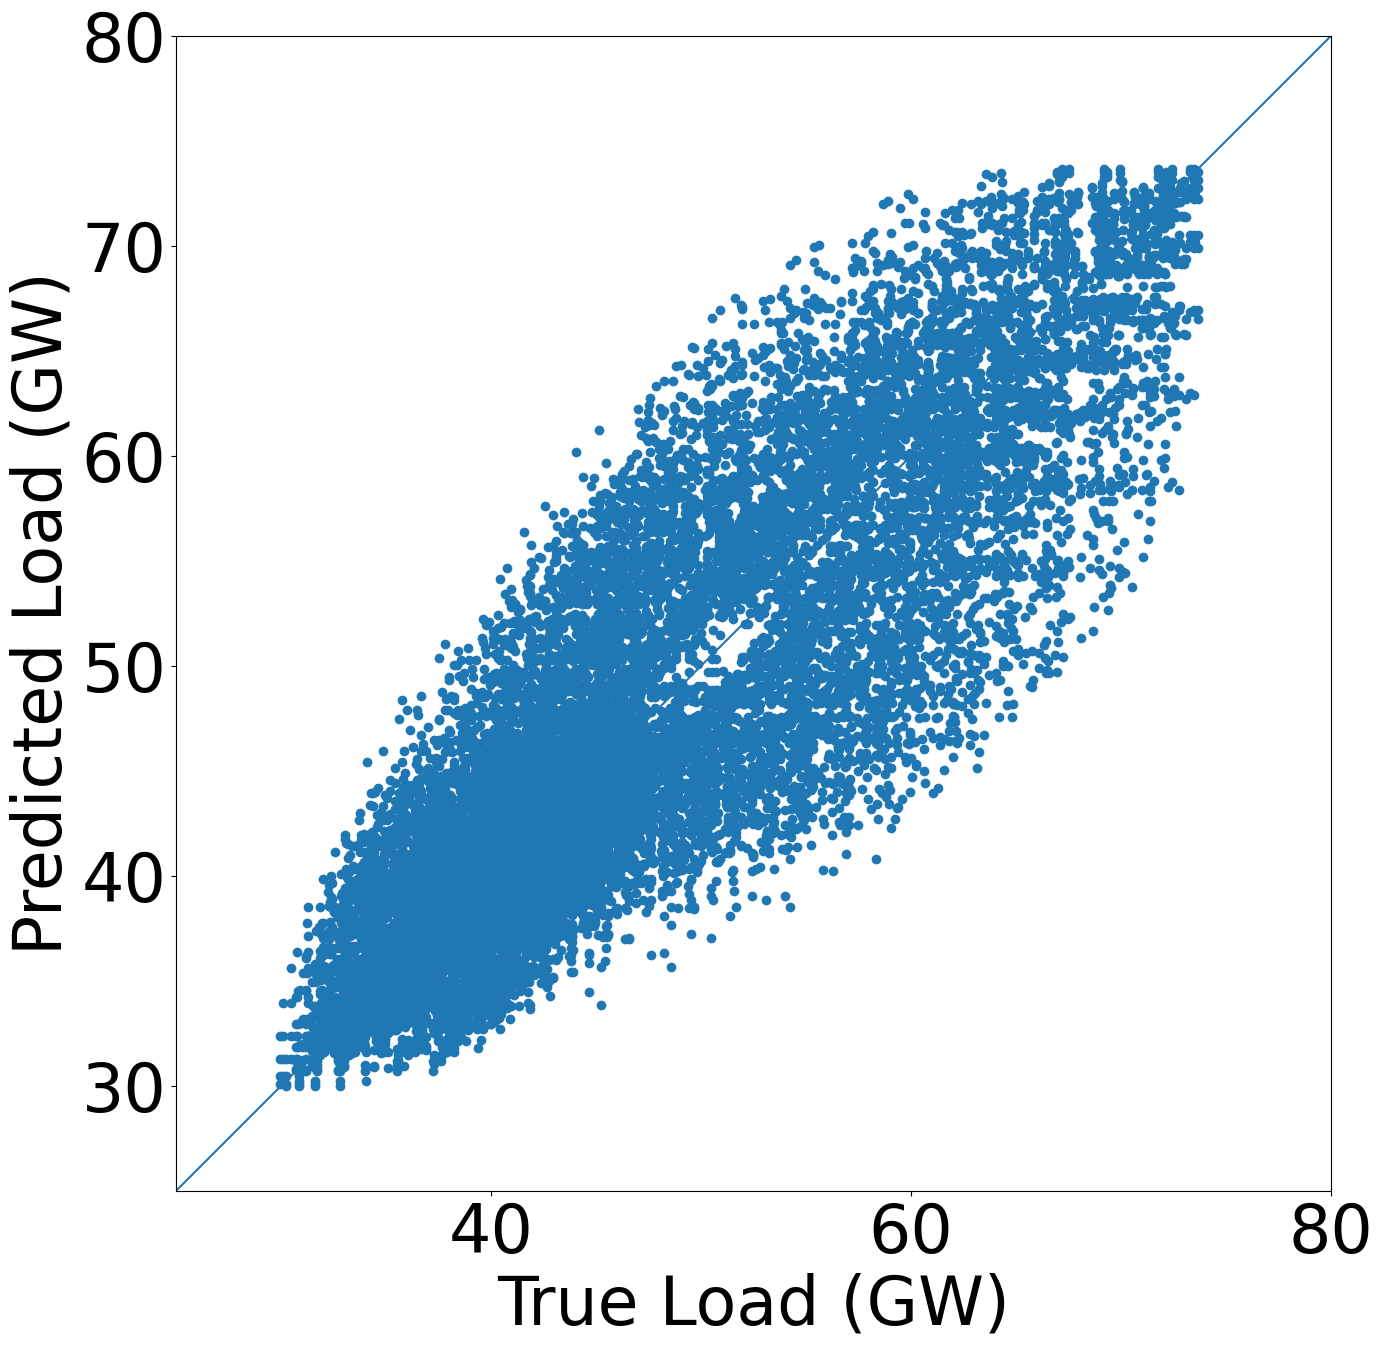

In [18]:
plt.figure(figsize=(25,15))
a = plt.axes(aspect='equal')
plt.scatter(test_labels['actual']/1000, predictions/1000)
plt.xlabel('True Load (GW)')
plt.ylabel('Predicted Load (GW)')
lims = [25, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [19]:
end = datetime.datetime.now()
print('total time:', end-start)

total time: 0:00:49.396232
